In [ ]:
  import os
  os.chdir('/content/drive/MyDrive/Udemy Project')
  os.getcwd()

'/content/drive/MyDrive/Udemy Project'

In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter('ignore')


In [ ]:
company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
companies_dict = dict(zip(company_list,company_name))

In [ ]:
companies_dict

{'AAPL': 'APPLE', 'AMZN': 'AMAZON', 'GOOG': 'GOOGLE', 'MSFT': 'MICROSOFT'}

In [ ]:
datasource = 'yahoo'
start_time = '2015-04-25'
end_time = '2020-04-25'
df_stocks = data.DataReader(company_list,data_source=datasource,start=start_time,end=end_time)

In [ ]:
companies_dict.values()

dict_values(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'])

In [ ]:
df_stocks.head()

Attributes  Adj Close                         ...     Volume                       
Symbols          AAPL        GOOG       MSFT  ...       GOOG        MSFT       AMZN
Date                                          ...                                  
2015-04-27  30.232006  555.369995  42.773468  ...  2398000.0  59248200.0  5430900.0
2015-04-28  29.755684  553.679993  43.779812  ...  1491000.0  60730800.0  4140500.0
2015-04-29  29.318098  549.080017  43.690742  ...  1698800.0  47804600.0  3621700.0
2015-04-30  28.522703  537.340027  43.316719  ...  2082200.0  64725500.0  3647900.0
2015-05-01  29.388752  537.900024  43.334538  ...  1768200.0  38937300.0  3565800.0

[5 rows x 24 columns]

In [ ]:
df_stocks.shape

(1259, 24)

In [ ]:
df_stocks.isna().sum()

Attributes  Symbols
Adj Close   AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
Close       AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
High        AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
Low         AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
Open        AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
Volume      AAPL       0
            GOOG       0
            MSFT       0
            AMZN       0
dtype: int64

In [ ]:
stock_open = np.array(df_stocks.Open).T
stock_close = np.array(df_stocks.Close).T

In [ ]:
movements = stock_close - stock_open

In [ ]:
sum_of_movements = np.sum(movements,1)

In [ ]:
sum_of_movements

array([  46.02497673,  593.83349609,   29.95990372, -166.57025146])

In [ ]:
for k in range(len(companies_dict)):
  print('company : {} , change : {}'.format(df_stocks['High'].columns[k],sum_of_movements[k]))

company : AAPL , change : 46.02497673034668
company : GOOG , change : 593.83349609375
company : MSFT , change : 29.959903717041016
company : AMZN , change : -166.57025146484375


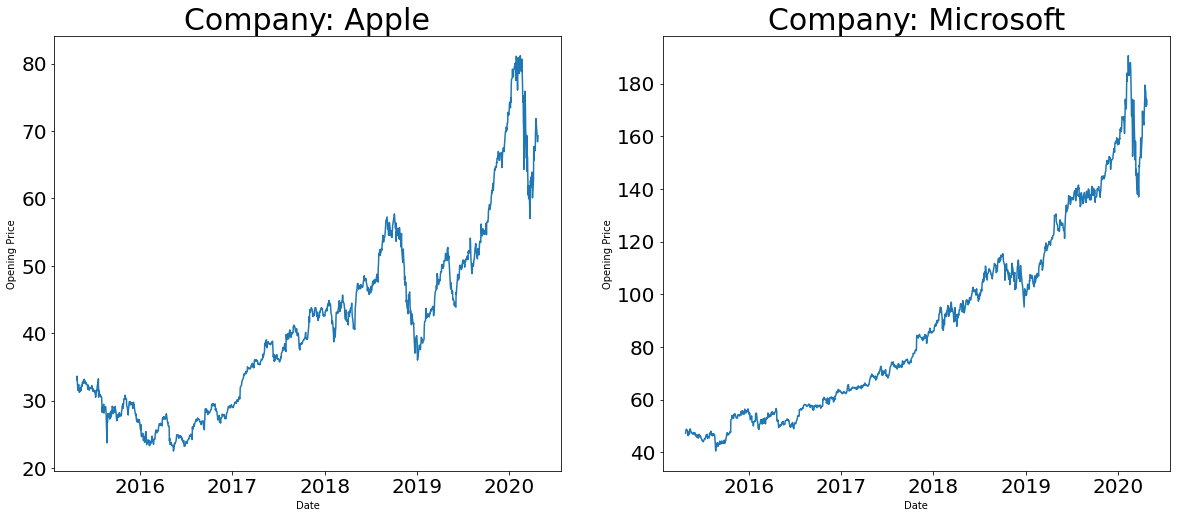

In [ ]:
# plotting the graphs
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.title('Company: Apple',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Opening Price',fontsize=10)
plt.plot(df_stocks['Open']['AAPL'])

plt.subplot(1,2,2)
plt.title('Company: Microsoft',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Opening Price',fontsize=10)
plt.plot(df_stocks['Open']['MSFT'])

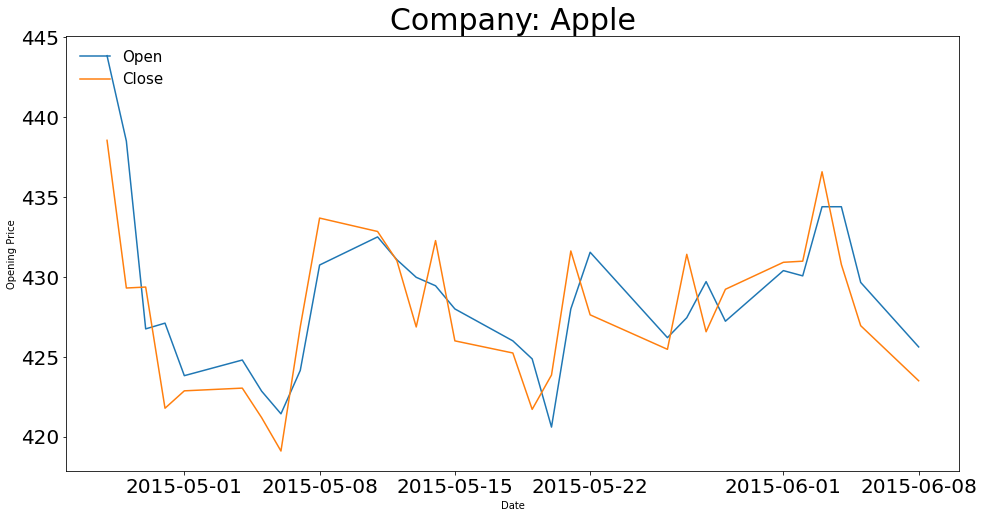

In [ ]:
plt.figure(figsize=(16,8))


plt.title('Company: Apple',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Opening Price',fontsize=10)
plt.plot(df_stocks.iloc[:30]['Open']['AMZN'],label='Open')
plt.plot(df_stocks.iloc[:30]['Close']['AMZN'],label='Close')
plt.legend(loc= 'upper left',frameon=False,fontsize=15)

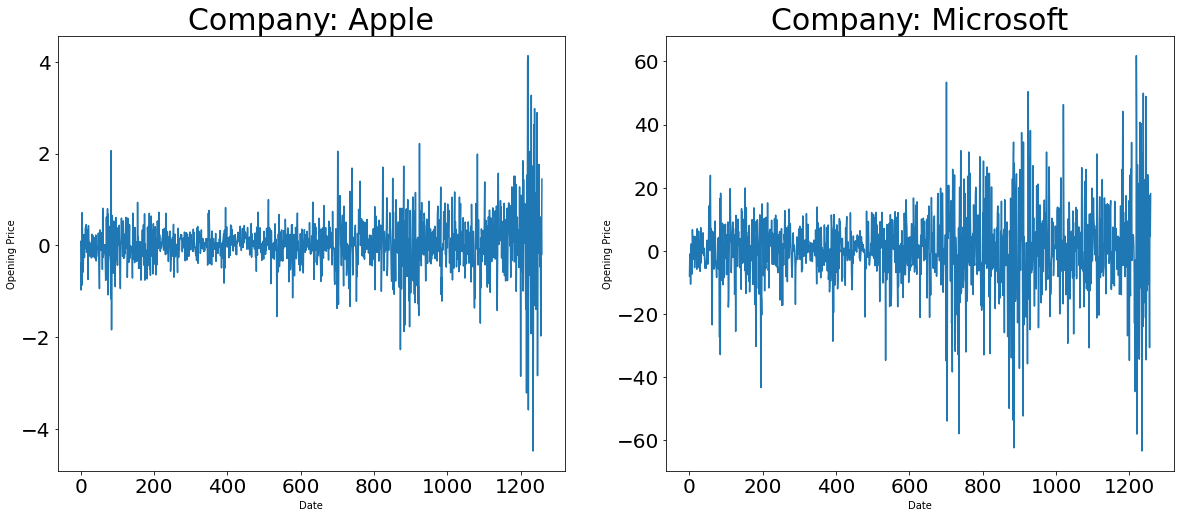

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.title('Company: Apple',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Opening Price',fontsize=10)
plt.plot(movements[0])

plt.subplot(1,2,2)
plt.title('Company: Microsoft',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Opening Price',fontsize=10)
plt.plot(movements[1])

# Building the model K means


In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline      import make_pipeline
from sklearn.cluster       import KMeans

# initialize the normalizer
normal = Normalizer()

# create the k means model
k_means_model = KMeans(n_clusters=2,verbose=1,n_jobs=-1,max_iter=1000)

# make the pipeline
pipeline = make_pipeline(normal,k_means_model)

pipeline.fit(movements)
predict_clust = pipeline.predict(movements)

In [ ]:
predict_clust

array([0, 1, 0, 1], dtype=int32)

In [ ]:
df_final_output = pd.DataFrame({'Cluster' : predict_clust,'companies' :list(companies_dict)})

In [ ]:
list(companies_dict)

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [ ]:
df_final_output

,Cluster,companies
0,0,AAPL
1,1,GOOG
2,0,MSFT
3,1,AMZN


In [ ]:
## With PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline      import make_pipeline
from sklearn.cluster       import KMeans
from sklearn.decomposition import PCA

# initialize the normalizer
normal = Normalizer()

# PCA
pca = PCA(n_components=2)

# create the k means model
k_means_model = KMeans(n_clusters=2,verbose=1,n_jobs=-1,max_iter=1000)

# make the pipeline
pipeline_pca = make_pipeline(normal,pca,k_means_model)

pipeline_pca.fit(movements)
predict_clust_pca = pipeline.predict(movements)

In [ ]:
predict_clust_pca

array([0, 1, 0, 1], dtype=int32)

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>